In [1]:
import numpy as np
import matplotlib.pyplot as plt
import em_determ_lib

In [2]:
DIST_RATIO = 0.5

In [3]:
Num_sensors1 = 5
Num_emitters1 = 1
sample_size1 = 100
theta1_rad = [0.1] # Направление прибытия (DOA) в радианах
theta1_deg = np.rad2deg(theta1_rad[0]) # Направление прибытия (DOA) в градусах
P_1 = 1 * np.eye(Num_emitters1, dtype=np.float64) # Ковариация шума
Q_1 = 1.1 * np.eye(Num_sensors1, dtype=np.float64) # Ковариация шума
A1 = np.exp(-2j * np.pi * DIST_RATIO * np.arange(Num_sensors1).reshape(-1,1) * np.sin(theta1_rad)) # Матрица управляющих векторов
# Генерация векторов сигнала, шума и принятого сигнала
S1 = em_determ_lib.gds(Num_emitters1, sample_size1)
n1 = em_determ_lib.gss(Num_sensors1, sample_size1, Q_1)
X1 = (A1 @ S1.T + n1.T).T

In [4]:
X1_with_mv = em_determ_lib.MCAR(X1, [2,4], [40, 40])

In [5]:
theta_list1 = np.linspace(-np.pi/2, np.pi/2, 181)
lkhd1 = {}

In [6]:
theta_list2 = np.linspace(theta1_rad[0]-0.1, theta1_rad[0]+0.1, 151)
lkhd2 = {}

In [7]:
for theta in theta_list1:
    lkhd1[theta] = em_determ_lib.multi_start_ECM(theta, X1_with_mv, 1, Q_1)

Initial theta = -1.5707963267948966
incomplete likelihood is -747.3761711894109 on iteration 0
incomplete likelihood is -719.9196202184559 on iteration 1
incomplete likelihood is -717.0382948493708 on iteration 2
incomplete likelihood is -716.6377517017678 on iteration 3
incomplete likelihood is -716.5760835546096 on iteration 4
incomplete likelihood is -716.5663134013223 on iteration 5
incomplete likelihood is -716.5647540468069 on iteration 6
incomplete likelihood is -716.5645047048849 on iteration 7
incomplete likelihood is -716.5644648163691 on iteration 8
incomplete likelihood is -716.5644584344545 on iteration 9
incomplete likelihood is -716.5644574133581 on iteration 10
incomplete likelihood is -716.5644572499829 on iteration 11
incomplete likelihood is -716.5644572238429 on iteration 12
incomplete likelihood is -716.5644572196607 on iteration 13
incomplete likelihood is -716.5644572189912 on iteration 14
incomplete likelihood is -716.5644572188842 on iteration 15
incomplete lik

In [8]:
x1 = list(lkhd1.keys())
y1 = list(lkhd1.values())

In [10]:
for theta in theta_list2:
    lkhd2[theta] = em_determ_lib.multi_start_ECM(theta, X1_with_mv, 1, Q_1, max_iter=20, rtol=1e-6)

Initial theta = 0.0
incomplete likelihood is -502.4957389592339 on iteration 0
incomplete likelihood is -463.99540610210505 on iteration 1
incomplete likelihood is -459.6053187815895 on iteration 2
incomplete likelihood is -458.9737034477723 on iteration 3
incomplete likelihood is -458.8754769398601 on iteration 4
incomplete likelihood is -458.8598739764141 on iteration 5
incomplete likelihood is -458.8573820333757 on iteration 6
incomplete likelihood is -458.8569835037338 on iteration 7
incomplete likelihood is -458.856919746241 on iteration 8
incomplete likelihood is -458.85690954533214 on iteration 9
incomplete likelihood is -458.85690791319837 on iteration 10
incomplete likelihood is -458.85690765205754 on iteration 11
incomplete likelihood is -458.8569076102751 on iteration 12
incomplete likelihood is -458.8569076035898 on iteration 13
incomplete likelihood is -458.8569076025201 on iteration 14
incomplete likelihood is -458.856907602349 on iteration 15
incomplete likelihood is -45

In [11]:
x2 = list(lkhd2.keys())
y2 = list(lkhd2.values())

In [12]:
# ESPRIT
th1, P1= em_determ_lib.ESPRIT_spectrum(X1, 1, -np.pi/2, np.pi/2, num_points=181)

In [13]:
# ESPRIT
th2, P2= em_determ_lib.ESPRIT_spectrum(X1, 1, theta1_rad[0]-0.1, theta1_rad[0]+0.1, num_points=151)

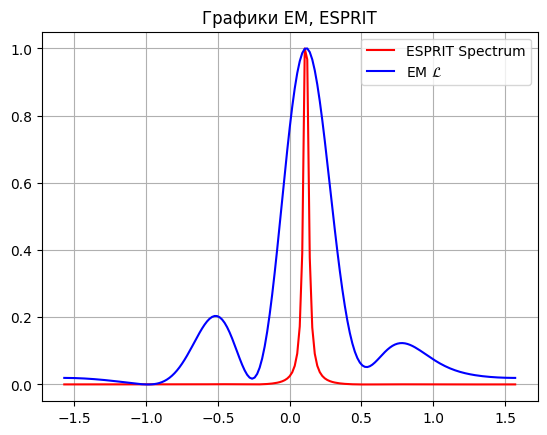

In [14]:
plt.plot(x1, em_determ_lib.normalization(P1), color='red', label='ESPRIT Spectrum')
plt.plot(x1, em_determ_lib.normalization(y1), color='blue', label=r'EM $\mathcal{L}$')
plt.title('Графики EM, ESPRIT')
plt.grid() 
plt.legend() 
plt.show()

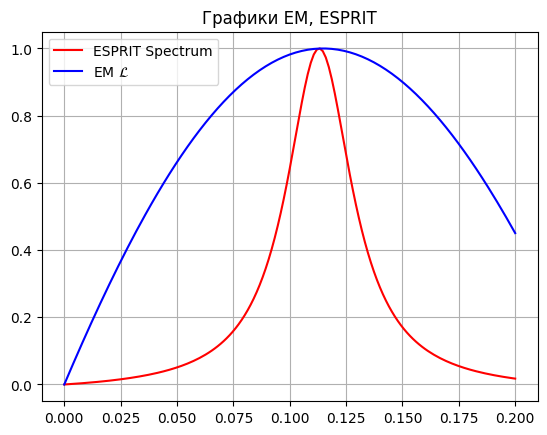

In [15]:
plt.plot(x2, em_determ_lib.normalization(P2), color='red', label='ESPRIT Spectrum')
plt.plot(x2, em_determ_lib.normalization(y2), color='blue', label=r'EM $\mathcal{L}$')
plt.title('Графики EM, ESPRIT')
plt.grid() 
plt.legend() 
plt.show()